In [ ]:
# Mengimport Fungsi yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mengimport data

dataset = pd.read_csv("ML.csv")
dataset.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [ ]:
dataset

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
...,...,...,...,...,...,...,...
2335,transfer,14945,43793,106907,2019-03-29 14:53:00,0,none
2336,transfer,9532,43793,106907,2019-04-13 13:19:00,0,none
2337,transfer,27332,43793,106907,2019-05-10 09:34:00,0,none
2338,transfer,32685,43793,106907,2019-07-08 12:20:00,0,none


In [ ]:
# Menampilkan informasi mengenai dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


In [ ]:
# Menghapus kolom yang tidak diperlukan

dataset.drop('date', axis=1, inplace=True)
dataset.head

<bound method NDFrame.head of      typeofaction  sourceid  destinationid  amountofmoney  isfraud typeoffraud
0         cash-in     30105          28942         494528        1       type1
1         cash-in     30105           8692         494528        1       type1
2         cash-in     30105          60094         494528        1       type1
3         cash-in     30105          20575         494528        1       type1
4         cash-in     30105          45938         494528        1       type1
...           ...       ...            ...            ...      ...         ...
2335     transfer     14945          43793         106907        0        none
2336     transfer      9532          43793         106907        0        none
2337     transfer     27332          43793         106907        0        none
2338     transfer     32685          43793         106907        0        none
2339     transfer     26390          43793         106907        0        none

[2340 rows x 6 column

In [ ]:
dataset

,typeofaction,sourceid,destinationid,amountofmoney,isfraud,typeoffraud
0,cash-in,30105,28942,494528,1,type1
1,cash-in,30105,8692,494528,1,type1
2,cash-in,30105,60094,494528,1,type1
3,cash-in,30105,20575,494528,1,type1
4,cash-in,30105,45938,494528,1,type1
...,...,...,...,...,...,...
2335,transfer,14945,43793,106907,0,none
2336,transfer,9532,43793,106907,0,none
2337,transfer,27332,43793,106907,0,none
2338,transfer,32685,43793,106907,0,none


In [ ]:
# Mencari nilai null pada dataset

dataset.isna().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
isfraud          0
typeoffraud      0
dtype: int64

In [ ]:
# transformasi data

dataset.loc[dataset['typeofaction'] == 'cash-in', 'typeofaction'] = 1
dataset.loc[dataset['typeofaction'] == 'transfer', 'typeofaction'] = 2
dataset.loc[dataset['typeoffraud'] == 'type1', 'typeoffraud'] = 1
dataset.loc[dataset['typeoffraud'] == 'type2', 'typeoffraud'] = 2
dataset.loc[dataset['typeoffraud'] == 'type3', 'typeoffraud'] = 3
dataset.loc[dataset['typeoffraud'] == 'none', 'typeoffraud'] = 0

dataset = dataset.apply(pd.to_numeric, errors="ignore")
dataset.head()

,typeofaction,sourceid,destinationid,amountofmoney,isfraud,typeoffraud
0,1,30105,28942,494528,1,1
1,1,30105,8692,494528,1,1
2,1,30105,60094,494528,1,1
3,1,30105,20575,494528,1,1
4,1,30105,45938,494528,1,1


In [ ]:
# Menampilkan informasi mengenai dataset setelah transformasi data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   typeofaction   2340 non-null   int64
 1   sourceid       2340 non-null   int64
 2   destinationid  2340 non-null   int64
 3   amountofmoney  2340 non-null   int64
 4   isfraud        2340 non-null   int64
 5   typeoffraud    2340 non-null   int64
dtypes: int64(6)
memory usage: 109.8 KB


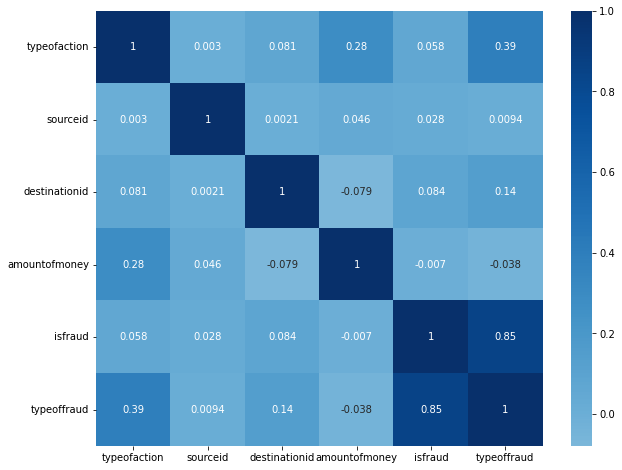

In [ ]:
correlation = dataset.corr(method='pearson')

fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(correlation, center = 0, cmap = "Blues", annot = True)

In [ ]:
print('Covariance diantara typeoffraud dan sourceid : ', dataset.typeoffraud.cov(dataset.sourceid))
print('Covariance diantara typeoffraud dan destinationid : ', dataset.typeoffraud.cov(dataset.destinationid))
print('Covariance diantara typeoffraud dan amountofmoney : ', dataset.typeoffraud.cov(dataset.amountofmoney))
print('Covariance diantara typeoffraud dan isfraud : ', dataset.typeoffraud.cov(dataset.isfraud))

Covariance diantara typeoffraud dan sourceid :  333.15934159897375
Covariance diantara typeoffraud dan destinationid :  4907.632036482824
Covariance diantara typeoffraud dan amountofmoney :  -115735.43468718788
Covariance diantara typeoffraud dan isfraud :  0.49618070400456


In [ ]:
#print('Covariance diantara sourceid dan typeoffraud : ', dataset.sourceid.cov(dataset.typeoffraud))

print('Covariance diantara typeofaction dan sourceid : ', dataset.typeofaction.cov(dataset.sourceid))
print('Covariance diantara typeofaction dan destinationid : ', dataset.typeofaction.cov(dataset.destinationid))
print('Covariance diantara typeofaction dan amountofmoney : ', dataset.typeofaction.cov(dataset.amountofmoney))
print('Covariance diantara typeofaction dan isfraud : ', dataset.typeofaction.cov(dataset.isfraud))
print('Covariance diantara typeofaction dan typeoffraud : ', dataset.typeofaction.cov(dataset.typeoffraud))
print('Covariance diantara sourceid dan destinationid : ', dataset.sourceid.cov(dataset.destinationid))
print('Covariance diantara sourceid dan amountofmoney : ', dataset.sourceid.cov(dataset.amountofmoney))
print('Covariance diantara sourceid dan isfraud : ', dataset.sourceid.cov(dataset.isfraud))
print('Covariance diantara sourceid dan typeoffraud : ', dataset.sourceid.cov(dataset.typeoffraud))
print('Covariance diantara destinationid dan amountofmoney : ', dataset.destinationid.cov(dataset.amountofmoney))
print('Covariance diantara destinationid dan isfraud : ', dataset.destinationid.cov(dataset.isfraud))
print('Covariance diantara destinationid dan typeoffraud : ', dataset.destinationid.cov(dataset.typeoffraud))
print('Covariance diantara amountofmoney dan isfraud : ', dataset.amountofmoney.cov(dataset.isfraud))
print('Covariance diantara amountofmoney dan typeoffraud : ', dataset.amountofmoney.cov(dataset.typeoffraud))
print('Covariance diantara isfraud dan typeooffraud : ', dataset.isfraud.cov(dataset.typeoffraud))

Covariance diantara typeofaction dan sourceid :  41.42364148606188
Covariance diantara typeofaction dan destinationid :  1093.7183799052127
Covariance diantara typeofaction dan amountofmoney :  341531.9125713008
Covariance diantara typeofaction dan isfraud :  0.013414308839704141
Covariance diantara typeofaction dan typeoffraud :  0.21989454182699233
Covariance diantara sourceid dan destinationid :  1764413.2349185124
Covariance diantara sourceid dan amountofmoney :  3478648856.064901
Covariance diantara sourceid dan isfraud :  400.75291818769784
Covariance diantara sourceid dan typeoffraud :  333.15934159897375
Covariance diantara destinationid dan amountofmoney :  -5893692678.0626955
Covariance diantara destinationid dan isfraud :  1194.9455297208617
Covariance diantara destinationid dan typeoffraud :  4907.632036482824
Covariance diantara amountofmoney dan isfraud :  -8738.733707881565
Covariance diantara amountofmoney dan typeoffraud :  -115735.43468718788
Covariance diantara isfra

In [ ]:
# Menghitung nilai pearson correlation dari kolom sourceid dan typeoffraud
# Menghitung nilai pearson correlation dari kolom typeofaction dan sourceid

pc1 = dataset.loc[:, ['typeofaction', 'sourceid']].corr(method = 'pearson')
pc2 = dataset.typeofaction.cov(dataset.sourceid) / (dataset.typeofaction.std() * dataset.sourceid.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
              typeofaction  sourceid
typeofaction      1.000000  0.002986
sourceid          0.002986  1.000000
Pearson Correlation :  0.002986293168985461


In [ ]:
# Menghitung nilai pearson correlation dari kolom destinationid dan typeoffraud
# Menghitung nilai pearson correlation dari kolom typeofaction dan destinationid

pc1 = dataset.loc[:, ['typeofaction', 'destinationid']].corr(method = 'pearson')
pc2 = dataset.typeofaction.cov(dataset.destinationid) / (dataset.typeofaction.std() * dataset.destinationid.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               typeofaction  destinationid
typeofaction       1.000000       0.080549
destinationid      0.080549       1.000000
Pearson Correlation :  0.08054939163727518


In [ ]:
# Menghitung nilai pearson correlation dari kolom amountofmoney dan typeoffraud
# Menghitung nilai pearson correlation dari kolom typeofaction dan amountofmoney

pc1 = dataset.loc[:, ['typeofaction', 'amountofmoney']].corr(method = 'pearson')
pc2 = dataset.typeofaction.cov(dataset.amountofmoney) / (dataset.typeofaction.std() * dataset.amountofmoney.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               typeofaction  amountofmoney
typeofaction       1.000000       0.284777
amountofmoney      0.284777       1.000000
Pearson Correlation :  0.28477736730397046


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom typeofaction dan isfraud

pc1 = dataset.loc[:, ['typeofaction', 'isfraud']].corr(method = 'pearson')
pc2 = dataset.typeofaction.cov(dataset.isfraud) / (dataset.typeofaction.std() * dataset.isfraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
              typeofaction   isfraud
typeofaction      1.000000  0.058395
isfraud           0.058395  1.000000
Pearson Correlation :  0.05839496084770196


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom typeofaction dan typeoffraud

pc1 = dataset.loc[:, ['typeofaction', 'typeoffraud']].corr(method = 'pearson')
pc2 = dataset.typeofaction.cov(dataset.typeoffraud) / (dataset.typeofaction.std() * dataset.typeoffraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
              typeofaction  typeoffraud
typeofaction      1.000000     0.393893
typeoffraud       0.393893     1.000000
Pearson Correlation :  0.39389297022763586


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom sourceid dan destiantionid

pc1 = dataset.loc[:, ['sourceid', 'destinationid']].corr(method = 'pearson')
pc2 = dataset.sourceid.cov(dataset.destinationid) / (dataset.sourceid.std() * dataset.destinationid.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               sourceid  destinationid
sourceid       1.000000       0.002055
destinationid  0.002055       1.000000
Pearson Correlation :  0.002055255539679939


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom sourceid dan amountofmoney

pc1 = dataset.loc[:, ['sourceid', 'amountofmoney']].corr(method = 'pearson')
pc2 = dataset.sourceid.cov(dataset.amountofmoney) / (dataset.sourceid.std() * dataset.amountofmoney.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               sourceid  amountofmoney
sourceid       1.000000       0.045877
amountofmoney  0.045877       1.000000
Pearson Correlation :  0.04587684456173501


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom sourceid dan isfraud

pc1 = dataset.loc[:, ['sourceid', 'isfraud']].corr(method = 'pearson')
pc2 = dataset.sourceid.cov(dataset.isfraud) / (dataset.sourceid.std() * dataset.isfraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
          sourceid   isfraud
sourceid  1.000000  0.027593
isfraud   0.027593  1.000000
Pearson Correlation :  0.027592593990668705


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom sourceid dan typeoffraud

pc1 = dataset.loc[:, ['sourceid', 'typeoffraud']].corr(method = 'pearson')
pc2 = dataset.sourceid.cov(dataset.typeoffraud) / (dataset.sourceid.std() * dataset.typeoffraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
             sourceid  typeoffraud
sourceid     1.000000     0.009439
typeoffraud  0.009439     1.000000
Pearson Correlation :  0.009438968617546081


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom destinationid dan amountofmoney

pc1 = dataset.loc[:, ['destinationid', 'amountofmoney']].corr(method = 'pearson')
pc2 = dataset.destinationid.cov(dataset.amountofmoney) / (dataset.destinationid.std() * dataset.amountofmoney.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               destinationid  amountofmoney
destinationid       1.000000      -0.079404
amountofmoney      -0.079404       1.000000
Pearson Correlation :  -0.07940411706501384


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom destinationid dan isfraud

pc1 = dataset.loc[:, ['destinationid', 'isfraud']].corr(method = 'pearson')
pc2 = dataset.destinationid.cov(dataset.isfraud) / (dataset.destinationid.std() * dataset.isfraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               destinationid  isfraud
destinationid        1.00000  0.08405
isfraud              0.08405  1.00000
Pearson Correlation :  0.08404977085525492


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom destinationid dan typeoffraud

pc1 = dataset.loc[:, ['destinationid', 'typeoffraud']].corr(method = 'pearson')
pc2 = dataset.destinationid.cov(dataset.typeoffraud) / (dataset.destinationid.std() * dataset.typeoffraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               destinationid  typeoffraud
destinationid       1.000000     0.142042
typeoffraud         0.142042     1.000000
Pearson Correlation :  0.14204211410838882


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom amountofmoney dan isfraud

pc1 = dataset.loc[:, ['amountofmoney', 'isfraud']].corr(method = 'pearson')
pc2 = dataset.amountofmoney.cov(dataset.isfraud) / (dataset.amountofmoney.std() * dataset.isfraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               amountofmoney   isfraud
amountofmoney       1.000000 -0.006959
isfraud            -0.006959  1.000000
Pearson Correlation :  -0.006959120502519247


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom amountofmoney dan typeoffraud

pc1 = dataset.loc[:, ['amountofmoney', 'typeoffraud']].corr(method = 'pearson')
pc2 = dataset.amountofmoney.cov(dataset.typeoffraud) / (dataset.amountofmoney.std() * dataset.typeoffraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
               amountofmoney  typeoffraud
amountofmoney       1.000000    -0.037925
typeoffraud        -0.037925     1.000000
Pearson Correlation :  -0.03792528981802332


In [ ]:
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud
# Menghitung nilai pearson correlation dari kolom isfraud dan typeoffraud

pc1 = dataset.loc[:, ['isfraud', 'typeoffraud']].corr(method = 'pearson')
pc2 = dataset.isfraud.cov(dataset.typeoffraud) / (dataset.isfraud.std() * dataset.typeoffraud.std())
print('PEARSON CORRELATION')
print(pc1)
print('Pearson Correlation : ', pc2)

PEARSON CORRELATION
              isfraud  typeoffraud
isfraud      1.000000     0.848859
typeoffraud  0.848859     1.000000
Pearson Correlation :  0.8488585397856552
